## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [409]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Data exploration

In [410]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")
columns_to_drop = ["DoctorInCharge","PatientID"]
random_seed=1234
np.random.seed(random_seed)

## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. Also cleaning the data makes it readily usable.

In [411]:

def clean_data(data, response_column=None, columns=None):
    if columns is None:
        columns = []
    ## copying Predictor variable data to a temporary variable for processing
    data.drop(columns, axis=1, inplace=True)
    predictor_columns=data.copy()
    predictor_columns.drop(response_column, axis=1, inplace=True)
    response_column=data[response_column]
    return predictor_columns,response_column,data



Let's Normalize the data, since we're using lasso regression as one of the models for regression, normalization is essential to give accurate predictions.


In [412]:
from sklearn import preprocessing
## Normalizing data, essential step in lasso regression as lasso regression is affected by the magnitude of measurements, ie. Higher numbers may disproportionally contribute to the prediction.
def normalize_data_min_max(raw_data):
    x = raw_data.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    return pd.DataFrame(min_max_scaler.fit_transform(x)) 
        
    

As seen here, the predicted values are reasonalbe close to actual values, making lasso regression a viable method for our dataset.

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [413]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
df.describe(exclude=None)


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,0.257384,0.105485,0.210368,134.392405,89.313442,132.529429,6.983682,2.753198,27.578147,66.829202,2.493736,149.881615,139.968984,4.505336,9.489156,3.505543,13.927304,224.251158,125.044597,60.746861,224.804603,0.295359,0.318264,5.011715,0.380952,0.202532,0.201929,5.016697,3.482121,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,0.437325,0.307270,0.407693,25.767794,17.354479,36.563035,1.734714,1.317168,12.808062,30.050836,1.449695,86.850287,2.905595,0.583963,0.574849,0.576634,2.338372,43.666586,42.645021,23.170415,100.321757,0.456341,0.465943,2.869813,0.485767,0.402007,0.401560,2.896311,1.986292,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,70.044768,4.000405,0.501799,5.000249,15.107850,0.000900,0.178427,135.006489,3.503408,8.500033,2.503727,10.004223,150.015707,50.074597,20.030993,50.267668,0.000000,0.000000,0.000469,0.000000,0.000000,0.000000,0.015194,0.005171,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,75.000000,100.504503,5.494988,1.583255,16.398275,41.149324,1.226335,76.784343,137.483563,3.993559,9.004488,2.984834,11.839478,186.440971,87.660348,41.252078,140.235507,0.000000,0.000000,2.619890,0.000000,0.000000,0.000000,2.464695,1.750661,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,89.000000,131.478423,6.988001,2.732006,28.077796,66.555207,2.505260,150.195312,139.863171,4.505416,9.470789,3.511712,13.909388,223.202106,126.537520,61.845056,226.466365,0.000000,0.000000,5.078511,0.000000,0.000000,0.000000,5.117247,3.519894,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.0000

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

In [414]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis

# Zarrin
### To be done

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

In [415]:
# Add code for scatter plot

# Katreyna
### To be done

Scatterplot showing 'GFR' and 'SerumCreatinine'

In [416]:
# Add code for scatter plot

# Katreyna 
### To be done


For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

In [417]:
# Add code for frequency tables/bar charts for categorical features


categorical_features = [
    # demographic
    'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
    ]



# Zarrin
### To be done

## 3. Bivariate Analysis

### 1. Correlation Analysis

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [418]:
# Add code for correlation matrix


# Anjali
### To be done


Visualize correlations using heatmaps to identify strong correlations (>0.5 or <-0.5) among variables.

Intrepret Correlation coefficient from the heatmap to indicate positive/negative/0/strength of relationships. For eg: test association of Edema and CKD diagnosis

Visualizing a heatmap for correlation between predictor . This helps us understand the relationship between predictor variable and their significance to the response variable ( the column 'Diagnosis', in our case ).


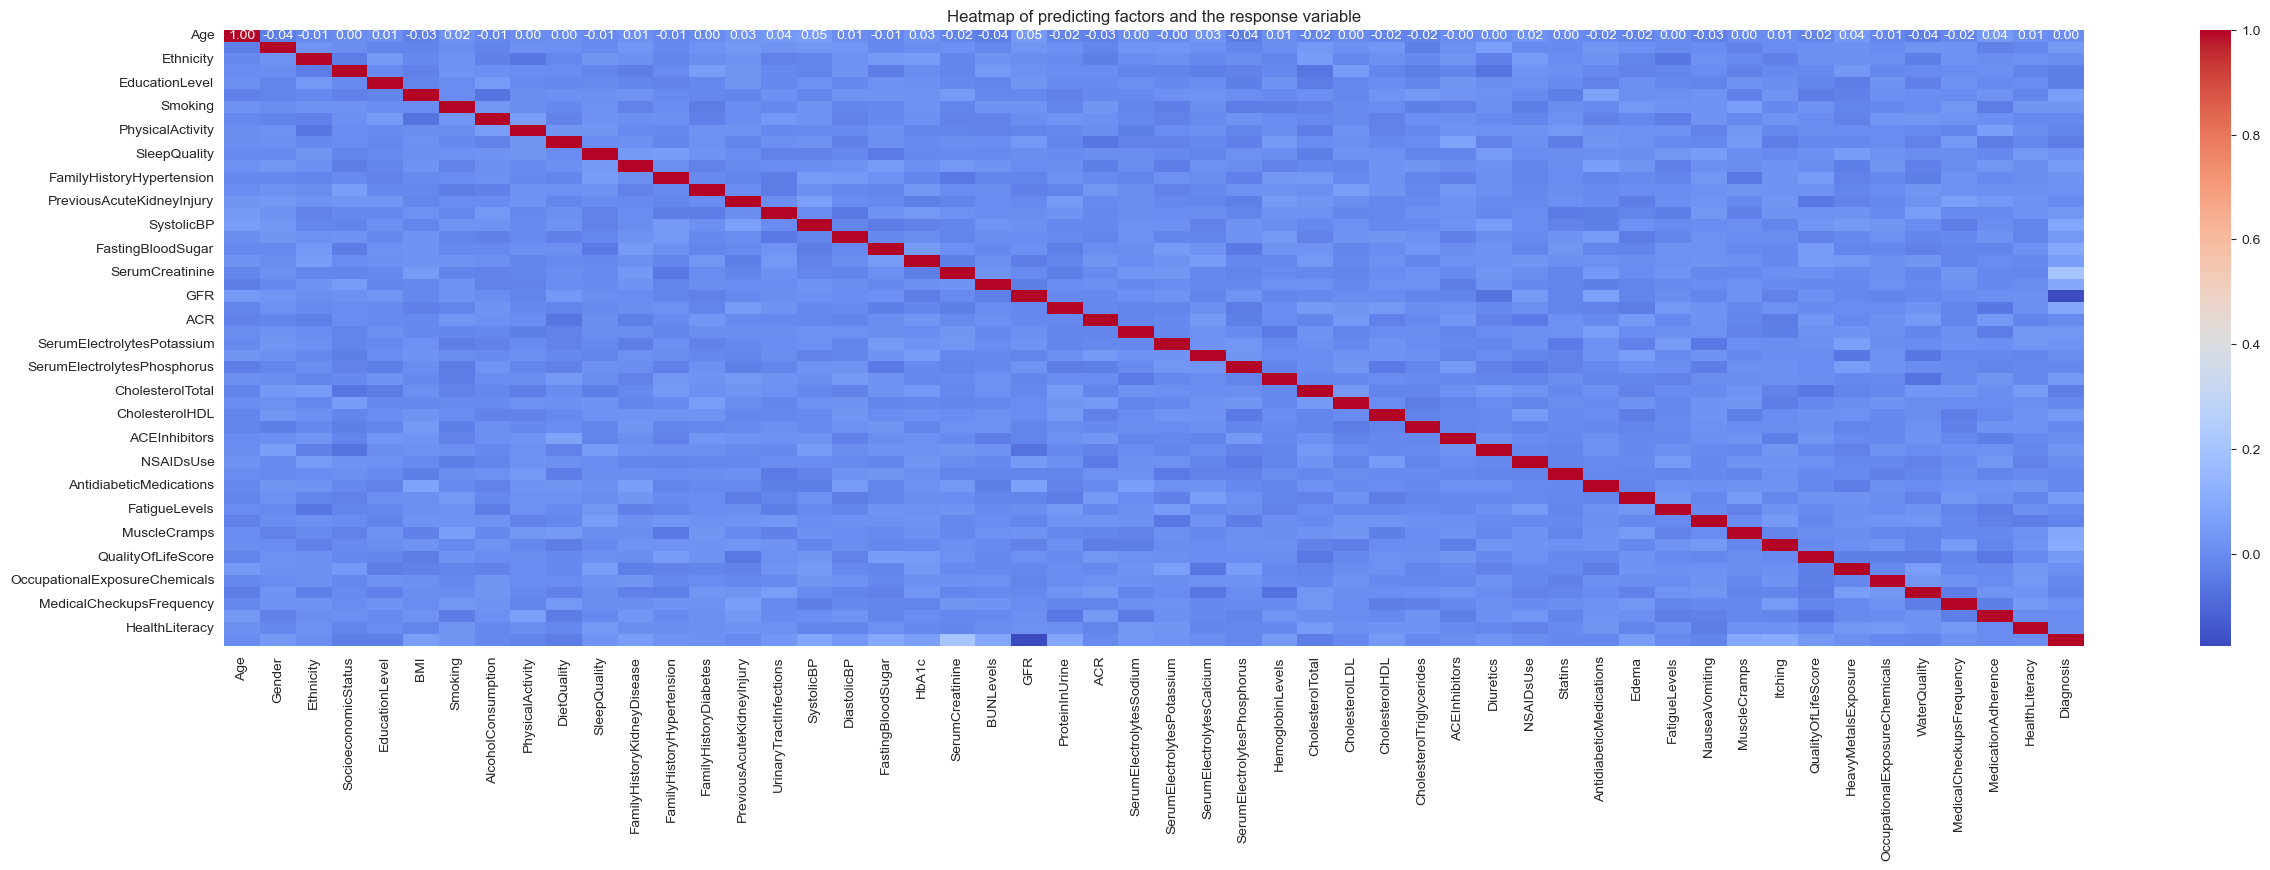

In [419]:
predictor_data,response_data,raw_data=clean_data(df,"Diagnosis",columns_to_drop)
corr_matrix = raw_data.corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of predicting factors and the response variable')
plt.show()

### 2. Relationships with CKD

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


In [420]:
# Add code for box plot


# Katreyna
### To be done

Let's also perform a T-Test to compare the means of our predictors ( features) with a positive CKD. The null and alternative hypotheses are as follows:

Null hypotheses : There is no difference between the means of each predictor column and the response variable (ie. a positive CKD diagnosis ).
Alternative hypothesis : The means of the predictor and response variables are NOT equal.

In [421]:
from scipy.stats import ttest_ind

# add code for t-test
def perform_ttest(x, y):
    t_test_results={}
    for column in x:
        t_stat, p_value = ttest_ind(x[column], y, equal_var=False)  # assuming unequal variance
        t_test_results[column] = {'t_stat': t_stat, 'p_value': p_value}
    return t_test_results
# Convert results to a DataFrame for better readability

t_test_df = pd.DataFrame(perform_ttest(predictor_data,response_data)).T
print(t_test_df)


                                    t_stat        p_value
Age                             106.075544   0.000000e+00
Gender                          -28.823967  1.549584e-158
Ethnicity                        -8.072241   1.210343e-15
SocioeconomicStatus               2.921968   3.516097e-03
EducationLevel                   33.181306  6.949219e-192
BMI                             149.108972   0.000000e+00
Smoking                         -47.985463   0.000000e+00
AlcoholConsumption               63.505305   0.000000e+00
PhysicalActivity                 58.078623   0.000000e+00
DietQuality                      58.149412   0.000000e+00
SleepQuality                    142.152446   0.000000e+00
FamilyHistoryKidneyDisease      -71.533761   0.000000e+00
FamilyHistoryHypertension       -47.053400   0.000000e+00
FamilyHistoryDiabetes           -52.215748   0.000000e+00
PreviousAcuteKidneyInjury       -80.514178   0.000000e+00
UrinaryTractInfections          -58.761963   0.000000e+00
SystolicBP    

Lets find what factors can predict the likelihood of a patient having Chronic Kidney Disease (CKD)?

## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



In [422]:
# add code here

# Kateryna
### To be done

Plots to show the model:

1. ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.

2. Variable coefficient plot: Display coefficients of predictors to understand their impact on CKD likelihood.

In [423]:
# Add code here

# Anjali
### To be done

## Logistic regression analysis to determine odds ratios

Perform logistic regression analysis to determine odds ratios and assess the significance of variables such as hypertension, diabetes, and medication use in relation to Chronic Kidney Disease (CKD).
Choosing the following independent variables (predictors) to include in the logistic regression model:

1. Hypertension (FamilyHistoryHypertension)
2. Diabetes (FamilyHistoryDiabetes or AntidiabeticMedications)
3. Medication use (ACEInhibitors, Diuretics, Statins, NSAIDsUse, etc.)

In [424]:
# Add code here

# Anjali
### To be done

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

In [425]:
# Add code here

# Anjali
### To be done

## Linear Regression

Add action item here


# add description and action item

In [426]:
# Add code here

# Zarrin
### To be done

Lasso Regression

Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that applies L1 regularization, effectively shrinking some coefficients to zero. This makes it particularly useful for feature selection, simplifying models by excluding irrelevant predictors, and enhancing interpretability. It is especially beneficial in high-dimensional datasets where the number of predictors is large relative to the number of observations, helping to identify the most significant predictors and reduce model complexity.

In [427]:
from sklearn.metrics import r2_score, mean_absolute_error
#implement lasso regression with MSE (Mean squared error) as the predictor variables are correlated.
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_data,Y_data,cleaned_raw_data=predictor_data,response_data,cleaned_raw_data
X_scaled = normalize_data_min_max(X_data)
X_train,X_test,y_train,y_test=train_test_split(X_scaled, Y_data, test_size=0.2, random_state=random_seed)
lasso = Lasso(alpha=0.3)
result=lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
coefficients = lasso.coef_
intercept = lasso.intercept_
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print ("mean Squared error : " + lasso_mse.__str__())
print("mean Absolute error : "+mae.__str__())
print("R-squared-score:" + r2.__str__())



mean Squared error : 0.08232249356167126
mean Absolute error : 0.15518744155219216
R-squared-score:-0.0015358201260102788


Once we've visualized the correlation between our predictor variables, let's visualize the results and accuracy of our prediction on a graph. based on the heatmap, some predictor variables are loosely correlated, using regression methods that accounts for this correlation can be helpful. 


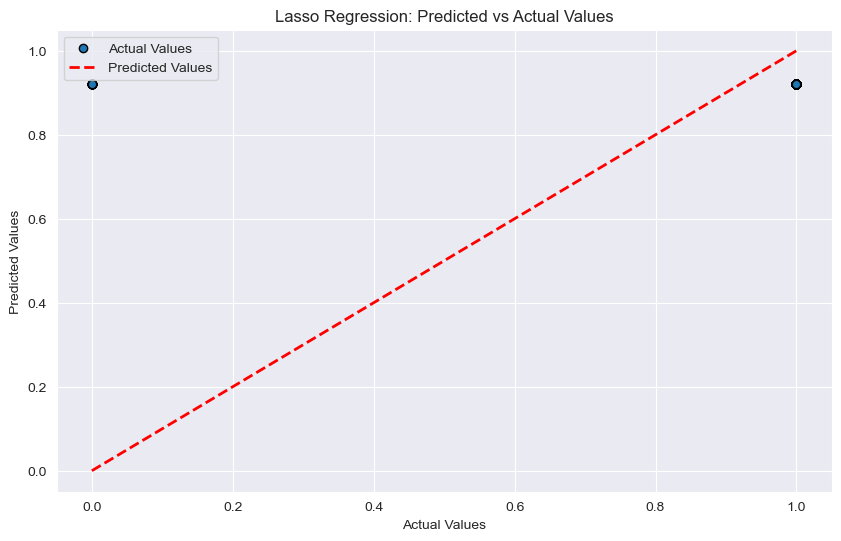

In [428]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predicted vs Actual Values')
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

Interpretation:
Mean Squared Error (MSE)

    MSE: 0.08232249356167126
        Interpretation: The MSE represents the average of the squared differences between the actual and predicted values. An MSE of 0.082 suggests that the predictions are, on average, off by the square root of this value. While this value indicates the magnitude of error.

Mean Absolute Error (MAE)

    MAE: 0.15518744155219216
        Interpretation: The MAE is the average of the absolute differences between the actual and predicted values. An MAE of 0.155 indicates that, on average, the model's predictions are off by 0.155 units. 

R-squared Score (R²)

    R-squared Score (R²): -0.0015358201260102788
        Interpretation: The R² score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value of -0.0015 is unusual and indicates that the model does not fit the data well. A negative R² value suggests that the model is performing worse than a simple horizontal line (mean of the dependent variable). This can happen when the chosen model is inappropriate for the data or if there is too much noise in the data.

